<a href="https://colab.research.google.com/github/abhi-11nav/Face-Mask-Detection/blob/main/Mask_Detection_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FACE MASK DETECTION

This project aims at detecting mask on human face:

Applications:
1. It can be used to monitor people where face masks are mandatory

Dataset credits : https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

**Tensorflow 2.0 Object detection Setup**

Cloning the tesnorflow model github repository

In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 78716, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 78716 (delta 33), reused 39 (delta 21), pack-reused 78659
Receiving objects: 100% (78716/78716), 593.68 MiB | 17.08 MiB/s, done.
Resolving deltas: 100% (56014/56014), done.


In [2]:
# Cloning the github repository consisting of data for the model

!git clone https://github.com/abhi-11nav/Face-Mask-Detection.git

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 1721, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1721 (delta 5), reused 0 (delta 0), pack-reused 1705
Receiving objects: 100% (1721/1721), 394.73 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (847/847), done.
Checking out files: 100% (1710/1710), done.


In [17]:
# Importing tensroflow 

import tensorflow

print(tensorflow.__version__)

2.9.2


Protofbuf Installtaion

In [18]:
pwd

'/content/training_demo'

In [19]:
cd /content/models/research

/content/models/research


In [20]:
!protoc object_detection/protos/*.proto --python_out=.

COCO API Installation

In [21]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [22]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [23]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [24]:
cp -r pycocotools <PATH_TO_TF>/TensorFlow/models/research/

/bin/bash: PATH_TO_TF: No such file or directory


Installing the Object detection API

In [25]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [26]:
cd /content/models/research

/content/models/research


In [27]:
cp object_detection/packages/tf2/setup.py .

In [28]:
!python -m pip install --use-feature=2020-resolver .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 43.7 MB/s 
     |████████████████████████████████| 352 kB 67.3 MB/s 
     |████████████████████████████████| 2.2 MB 61.1 MB/s 
     |████████████████████████████████| 25.0 MB 1.4 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 116 kB 77.8 MB/s 
     |████████████████████████████████| 636 kB 53.4 MB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |

Testing the installation

In [29]:
!python object_detection/builders/model_builder_tf2_test.py

2022-11-15 18:06:55.366679: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 18:06:56.129966: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-15 18:06:56.130183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-15 18:06:56.130204: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

Installation sucessfully completed

**Setting up folder structure for images**

In [4]:
pwd

'/content'

In [5]:
cd /content

/content


In [6]:
# Importing necessary libraries

import os
import shutil 
from glob import glob
from sklearn.model_selection import train_test_split

In [7]:
# Path to images and annotations

images_path = "/content/Face-Mask-Detection/images"
annotations_path = "/content/Face-Mask-Detection/annotations"

In [8]:
print("Images size:",len(glob(images_path+"/*")),"Annotations size:",len(glob(annotations_path+"/*")))

Images size: 853 Annotations size: 853


In [9]:
# Sorting the images to match images with their annotations

img_paths, annot_path = sorted(glob(images_path+"/*")),sorted(glob(annotations_path+"/*"))

In [10]:
# Splitting the images into train and test sets

train_X, test_X, train_y, test_y = train_test_split(img_paths, annot_path, test_size=0.12, random_state=13)

In [11]:
# Moving images to repsective paths

from tqdm import tqdm

# Training images
for img,annot in tqdm(zip(train_X, train_y)):
  shutil.move(img,"/content/training_demo/images/train")
  shutil.move(annot, "/content/training_demo/images/train")

# Testing images
for img,annot in tqdm(zip(test_X,test_y)):
  shutil.move(img, "/content/training_demo/images/test")
  shutil.move(annot, "/content/training_demo/images/test")

750it [00:00, 13032.26it/s]
103it [00:00, 13137.89it/s]


Folder strucuture set up completed

Converting .xml files to .record files

In [30]:
pwd

'/content/models/research'

In [31]:
cd /content/training_demo

/content/training_demo


In [32]:
!python /content/generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

2022-11-15 18:07:57.918814: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/training_demo/annotations/train.record


In [33]:
!python /content/generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

2022-11-15 18:08:05.272620: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/training_demo/annotations/test.record


Downloading and loading the pre-trained model

In [34]:
cd /content/training_demo/pre-trained models

/content/training_demo/pre-trained models


In [35]:
# Downloadin the Resnetv101 model

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz

--2022-11-15 18:08:10--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128, 2404:6800:4003:c11::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386640082 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.73M  50.3MB/s    in 7.3s    

2022-11-15 18:08:19 (50.3 MB/s) - ‘ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz’ saved [386640082/386640082]



In [36]:
# Extracting the tar file 

!tar -xvf ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/variables.index


Tensorboard for visualzing training

In [ ]:
!tensorboard --logdir=models/my_ssd_resnet50_v1_fpn

2022-11-13 21:02:37.590761: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-13 21:02:38.207881: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-13 21:02:38.207983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-13 21:02:38.208001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

Training the model

In [37]:
pwd

'/content/training_demo/pre-trained models'

In [38]:
cd /content/training_demo

/content/training_demo


Executing the Model

In [41]:
!python /content/model_main_tf2.py --model_dir=/content/training_demo/model/my_ssd --pipeline_config_path=/content/training_demo/model/my_ssd/pipeline.config

2022-11-15 18:11:13.915596: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 18:11:14.674283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-15 18:11:14.674393: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-15 18:11:14.674412: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [42]:
# Exporting the model


!python /content/exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/model/my_ssd/pipeline.config --trained_checkpoint_dir /content/training_demo/model/my_ssd --output_directory /content/training_demo/exported model/my_model

2022-11-15 20:56:33.998419: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 20:56:35.368285: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-15 20:56:35.369056: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-15 20:56:35.369082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

Loading model...Done! Took 25.099032402038574 seconds
Running inference for /content/training_demo/images/test/maksssksksss200.png... Done


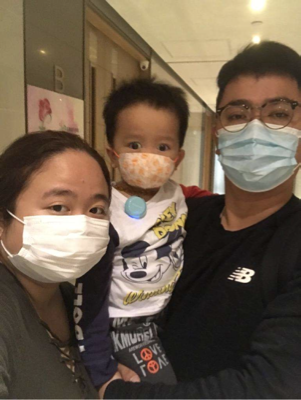

In [49]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/test/maksssksksss200.png'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/exported/saved_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_MODEL_DIR)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED

Saving the progress

In [ ]:
cd /content/training_demo

/content/training_demo


In [ ]:
!zip -r /content/model.zip /content/training_demo/model 

  adding: content/training_demo/model/ (stored 0%)
  adding: content/training_demo/model/my_ssd/ (stored 0%)
  adding: content/training_demo/model/my_ssd/ckpt-1.index (deflated 84%)
  adding: content/training_demo/model/my_ssd/ckpt-3.index (deflated 84%)
  adding: content/training_demo/model/my_ssd/ckpt-1.data-00000-of-00001 (deflated 7%)
  adding: content/training_demo/model/my_ssd/ckpt-2.index (deflated 84%)
  adding: content/training_demo/model/my_ssd/pipeline.config (deflated 67%)
  adding: content/training_demo/model/my_ssd/train/ (stored 0%)
  adding: content/training_demo/model/my_ssd/train/events.out.tfevents.1668458152.8662457ec054.634.0.v2 (deflated 8%)
  adding: content/training_demo/model/my_ssd/train/events.out.tfevents.1668458245.8662457ec054.693.0.v2 (deflated 1%)
  adding: content/training_demo/model/my_ssd/ckpt-3.data-00000-of-00001 (deflated 6%)
  adding: content/training_demo/model/my_ssd/checkpoint (deflated 63%)
  adding: content/training_demo/model/my_ssd/ckpt-2.d